In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('updated_pollution_dataset.csv')
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['Air Quality'])
print(f"\nEncoded Classes: {list(zip(le.classes_, range(len(le.classes_))))}")
df


Encoded Classes: [('Good', 0), ('Hazardous', 1), ('Moderate', 2), ('Poor', 3)]


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,target
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous,1
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate,2
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate,2
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good,0


# Model 1

In [4]:
#Model 1
# Select 3 key features (PM2.5, Temperature, Population_Density)
features_3 = ['PM2.5', 'Temperature', 'Population_Density']
X1 = df[features_3]
y = df['target']

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

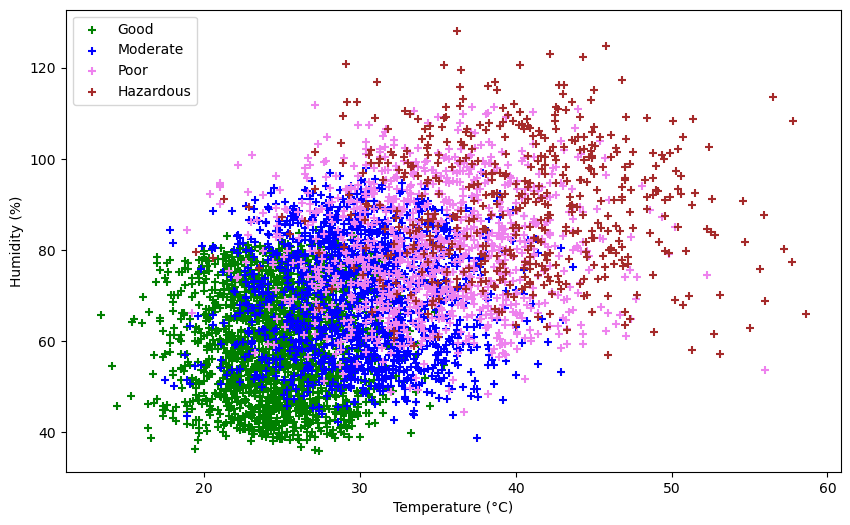

In [6]:
plt.figure(figsize=(10, 6))
df_good = df[df['Air Quality'] == 'Good']
df_moderate = df[df['Air Quality'] == 'Moderate']
df_poor = df[df['Air Quality'] == 'Poor']
df_hazardous = df[df['Air Quality'] == 'Hazardous']
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.scatter(df_good["Temperature"], df_good["Humidity"], color="green", marker="+", label="Good")
plt.scatter(df_moderate["Temperature"], df_moderate["Humidity"], color="blue", marker="+", label="Moderate")
plt.scatter(df_poor["Temperature"], df_poor["Humidity"], color="violet", marker="+", label="Poor")
plt.scatter(df_hazardous["Temperature"], df_hazardous["Humidity"], color="brown", marker="+", label="Hazardous")
plt.legend()
plt.show()

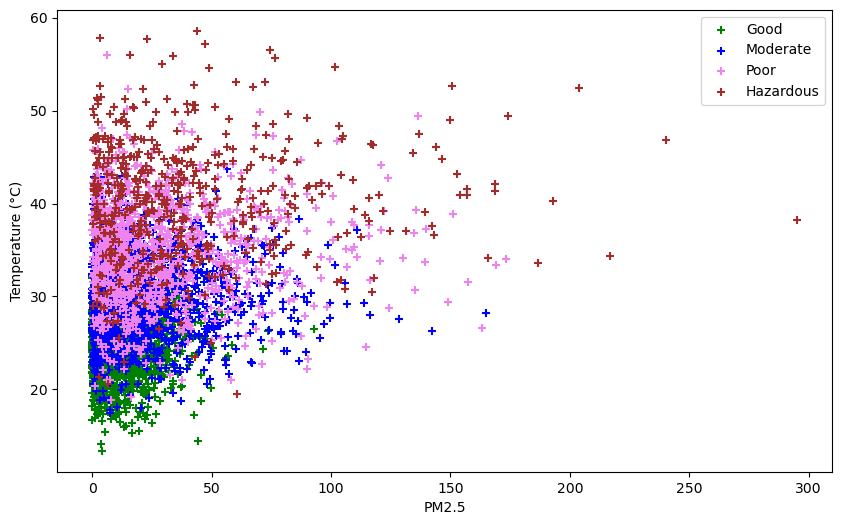

In [7]:
plt.figure(figsize=(10, 6))

plt.xlabel("PM2.5")
plt.ylabel("Temperature (°C)")

plt.scatter(df_good["PM2.5"], df_good["Temperature"], color="green", marker="+", label="Good")
plt.scatter(df_moderate["PM2.5"], df_moderate["Temperature"], color="blue", marker="+", label="Moderate")
plt.scatter(df_poor["PM2.5"], df_poor["Temperature"], color="violet", marker="+", label="Poor")
plt.scatter(df_hazardous["PM2.5"], df_hazardous["Temperature"], color="brown", marker="+", label="Hazardous")
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2)

In [10]:
len(X1_train)

4000

In [11]:
len(X1_test)

1000

In [12]:
from sklearn.svm import SVC
# Create and train SVM model (NO SCALING)
svm_model1 = SVC(kernel='rbf', C=1.0)

In [13]:
svm_model1.fit(X1_train, y1_train)

SVC()

In [14]:
svm_model1.score(X1_test,y1_test)

0.589

Model 1 is likely to be simpler due to the reduced number of features. if the features selected is highly correlated with the target, the model should perform well.

# Model 2

In [15]:
#Model 2

# Select 8 important features('Temperature', 'Humidity', 'PM2.5', 'PM10','NO2','SO2','CO', 'Proximity_to_Industrial_Areas')
features_8 = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 
              'NO2','SO2','CO', 'Proximity_to_Industrial_Areas']
X2 = df[features_8]

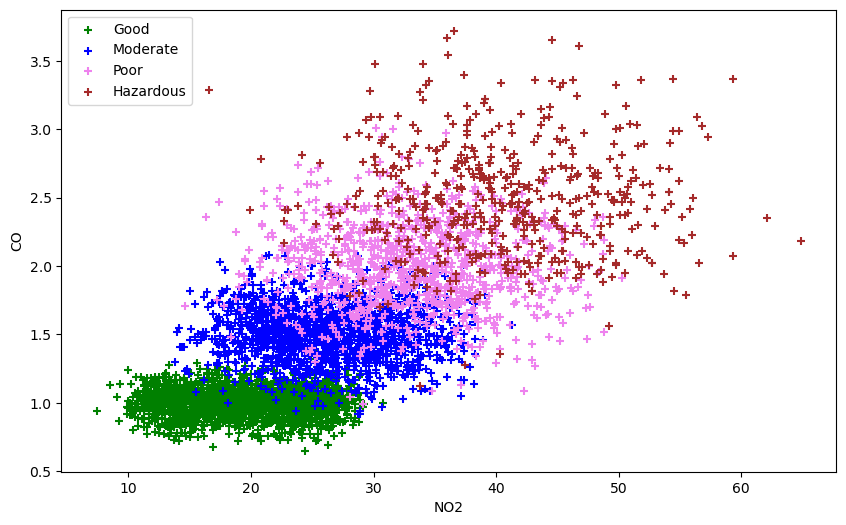

In [16]:
plt.figure(figsize=(10, 6))
plt.xlabel("NO2")
plt.ylabel("CO")
plt.scatter(df_good["NO2"], df_good["CO"], color="green", marker="+", label="Good")
plt.scatter(df_moderate["NO2"], df_moderate["CO"], color="blue", marker="+", label="Moderate")
plt.scatter(df_poor["NO2"], df_poor["CO"], color="violet", marker="+", label="Poor")
plt.scatter(df_hazardous["NO2"], df_hazardous["CO"], color="brown", marker="+", label="Hazardous")
plt.legend()
plt.show()

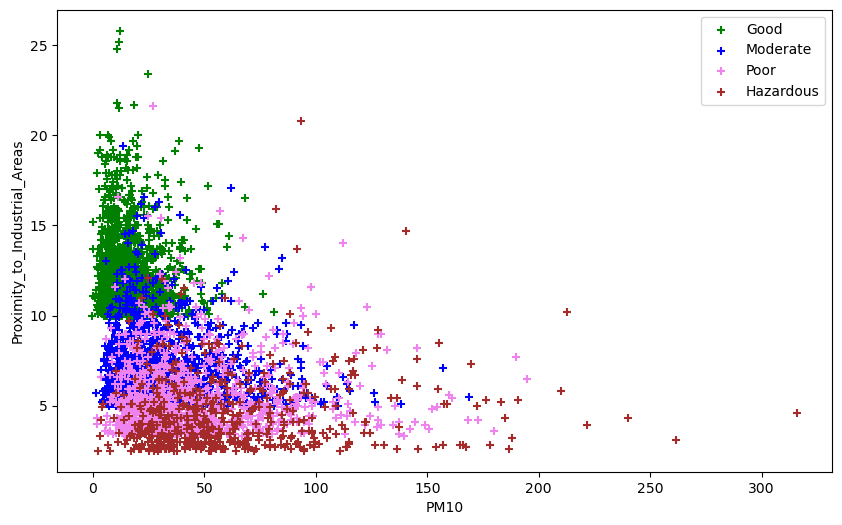

In [17]:
plt.figure(figsize=(10, 6))
plt.xlabel("PM10")
plt.ylabel("Proximity_to_Industrial_Areas")
plt.scatter(df_good["PM10"], df_good["Proximity_to_Industrial_Areas"], color="green", marker="+", label="Good")
plt.scatter(df_moderate["PM10"], df_moderate["Proximity_to_Industrial_Areas"], color="blue", marker="+", label="Moderate")
plt.scatter(df_poor["PM10"], df_poor["Proximity_to_Industrial_Areas"], color="violet", marker="+", label="Poor")
plt.scatter(df_hazardous["PM10"], df_hazardous["Proximity_to_Industrial_Areas"], color="brown", marker="+", label="Hazardous")
plt.legend()
plt.show()

In [18]:
# Split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2)

In [19]:
len(X2_train)

4000

In [20]:
len(X2_test)

1000

In [21]:
svm_model2 = SVC(kernel='rbf', C=1.0)

In [22]:
svm_model2.fit(X2_train, y2_train)

SVC()

In [23]:
svm_model2.score(X2_test,y2_test)

0.88

With a larger set of features. Model 2 has the potential tp provide more robust predictions, assuming the relationshipps between these additional features and target variable are meaningful

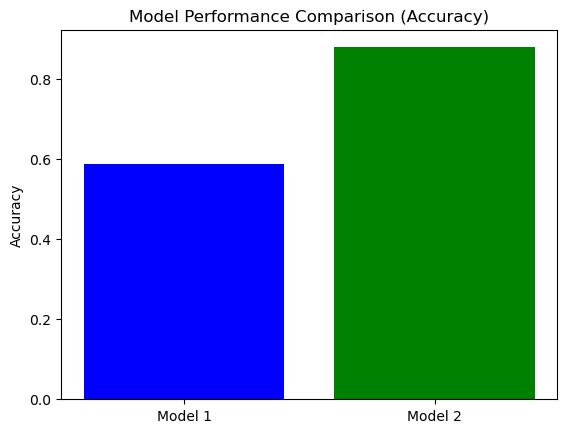

In [24]:
model_1_accuracy = svm_model1.score(X1_test, y1_test)
model_2_accuracy = svm_model2.score(X2_test, y2_test)

plt.bar(['Model 1', 'Model 2'], [model_1_accuracy, model_2_accuracy], color=['blue', 'green'])
plt.title('Model Performance Comparison (Accuracy)')
plt.ylabel('Accuracy')
plt.show()

### Model Comparison
From the accuracy plot, you can compare the performance of the both models, Model 2 shows a better performance due to the larger number of features, assuming those additional features are releveant. However, this is not guaranteed, and it is also lead to more noise or overfitting